In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#http://www.fao.org/faostat/en/#data/FS

food_security = pd.read_csv('FAOSTAT_data.csv')
food_security

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,87,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,88,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,91,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,92,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,92,F,FAO estimate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,FS,Suite of Food Security Indicators,181,Zimbabwe,6123,Value,21061,Average fat supply (g/cap/day) (3-year average),20122014,2012-2014,g/capita/day,56.3,F,FAO estimate,NaN
105335,FS,Suite of Food Security Indicators,181,Zimbabwe,6123,Value,21061,Average fat supply (g/cap/day) (3-year average),20132015,2013-2015,g/capita/day,54.3,F,FAO estimate,NaN
105336,FS,Suite of Food Security Indicators,181,Zimbabwe,6123,Value,21061,Average fat supply (g/cap/day) (3-year average),20142016,2014-2016,g/capita/day,52.3,F,FAO estimate,NaN
105337,FS,Suite of Food Security Indicators,181,Zimbabwe,6123,Value,21061,Average fat supply (g/cap/day) (3-year average),20152017,2015-2017,g/capita/day,51.7,F,FAO estimate,NaN


In [45]:
#data cleaning

#convert all values in Value column from string to float

for i in range(len(food_security['Value'])):
    if (food_security['Value'][i] == '<2.5'):
        food_security['Value'][i] = '1.25'
        
for i in range(len(food_security['Value'])):
    if (food_security['Value'][i] == '<0.1'):
        food_security['Value'][i] = '0.5'
        
for i in range(len(food_security['Value'])):
    if (food_security['Value'][i] == '<0.5'):
        food_security['Value'][i] = '0.25'

food_security['Value'] = food_security['Value'].apply(lambda x: float(x))

#remove NaN

food_security = food_security.dropna(subset = ['Value'])

/Users/hannahylong/opt/anaconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/hannahylong/opt/anaconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/hannahylong/opt/anaconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
sorted(food_security['Item'].unique())

['Average dietary energy requirement (kcal/cap/day)',
 'Average dietary energy supply adequacy (percent) (3-year average)',
 'Average fat supply (g/cap/day) (3-year average)',
 'Average protein supply (g/cap/day) (3-year average)',
 'Average supply of protein of animal origin (g/cap/day) (3-year average)',
 'Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
 'Cereal import dependency ratio (percent) (3-year average)',
 'Coefficient of variation of habitual caloric consumption distribution (real number)',
 'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
 'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
 'Incidence of caloric losses at retail distribution level (percent)',
 'Minimum dietary energy requirement  (kcal/cap/day)',
 'Number of moderately or severely food insecure people (million) (3-year average)',
 'Number of people undernourished (million) 

In [47]:
food_security_npu = food_security[food_security['Item'] == 'Number of people undernourished (million) (3-year average)']
food_security_npu

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
144,FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,10.3,F,FAO estimate,NaN
145,FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20012003,2001-2003,millions,10.3,F,FAO estimate,NaN
146,FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20022004,2002-2004,millions,9.6,F,FAO estimate,NaN
147,FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20032005,2003-2005,millions,9.4,F,FAO estimate,NaN
148,FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20042006,2004-2006,millions,9.2,F,FAO estimate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103830,FS,Suite of Food Security Indicators,249,Yemen,6132,Value,210011,Number of people undernourished (million) (3-y...,20142016,2014-2016,millions,11.5,F,FAO estimate,NaN
103831,FS,Suite of Food Security Indicators,249,Yemen,6132,Value,210011,Number of people undernourished (million) (3-y...,20152017,2015-2017,millions,12.5,F,FAO estimate,NaN
103832,FS,Suite of Food Security Indicators,249,Yemen,6132,Value,210011,Number of people undernourished (million) (3-y...,20162018,2016-2018,millions,13.0,F,FAO estimate,NaN
103833,FS,Suite of Food Security Indicators,249,Yemen,6132,Value,210011,Number of people undernourished (million) (3-y...,20172019,2017-2019,millions,12.9,F,FAO estimate,NaN


In [48]:
food_security_npu_2000 = food_security_npu[food_security_npu['Year'] == '2000-2002']
food_security_npu_2000 = food_security_npu_2000.sort_values(by = 'Value', ascending = False)
food_security_npu_2000

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
44335,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,198.3,F,FAO estimate,NaN
19387,FS,Suite of Food Security Indicators,351,China,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,132.5,F,FAO estimate,NaN
20694,FS,Suite of Food Security Indicators,41,"China, mainland",6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,131.5,F,FAO estimate,NaN
44890,FS,Suite of Food Security Indicators,101,Indonesia,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,41.1,F,FAO estimate,NaN
33208,FS,Suite of Food Security Indicators,238,Ethiopia,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,32.0,F,FAO estimate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101093,FS,Suite of Food Security Indicators,234,Uruguay,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,0.1,F,FAO estimate,NaN
98859,FS,Suite of Food Security Indicators,225,United Arab Emirates,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,0.1,F,FAO estimate,NaN
95217,FS,Suite of Food Security Indicators,220,Trinidad and Tobago,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,0.1,F,FAO estimate,NaN
11727,FS,Suite of Food Security Indicators,80,Bosnia and Herzegovina,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,0.1,F,FAO estimate,NaN


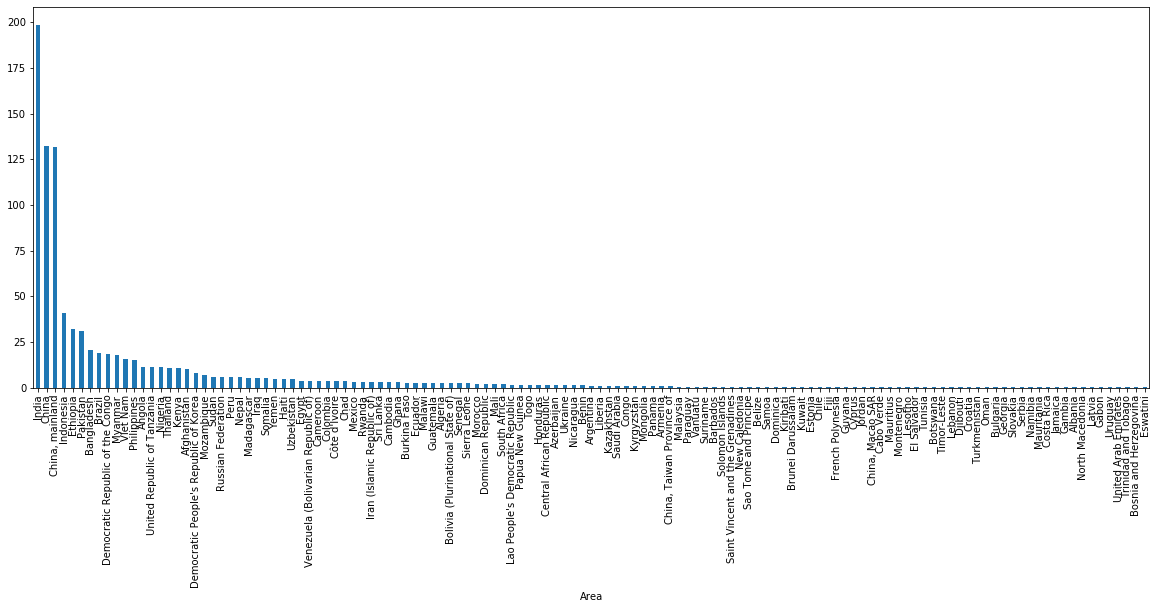

In [49]:
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
food_security_npu_2000.plot.bar(x = 'Area', y = 'Value', ax = ax, legend = None)

In [50]:
food_security_npu_ind = food_security_npu[food_security_npu['Area'] == 'India']
food_security_npu_ind

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
44335,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,198.3,F,FAO estimate,NaN
44336,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20012003,2001-2003,millions,219.3,F,FAO estimate,NaN
44337,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20022004,2002-2004,millions,239.3,F,FAO estimate,NaN
44338,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20032005,2003-2005,millions,249.6,F,FAO estimate,NaN
44339,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20042006,2004-2006,millions,247.8,F,FAO estimate,NaN
44340,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20052007,2005-2007,millions,228.8,F,FAO estimate,NaN
44341,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20062008,2006-2008,millions,207.2,F,FAO estimate,NaN
44342,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20072009,2007-2009,millions,199.0,F,FAO estimate,NaN
44343,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20082010,2008-2010,millions,199.0,F,FAO estimate,NaN
44344,FS,Suite of Food Security Indicators,100,India,6132,Value,210011,Number of people undernourished (million) (3-y...,20092011,2009-2011,millions,197.2,F,FAO estimate,NaN


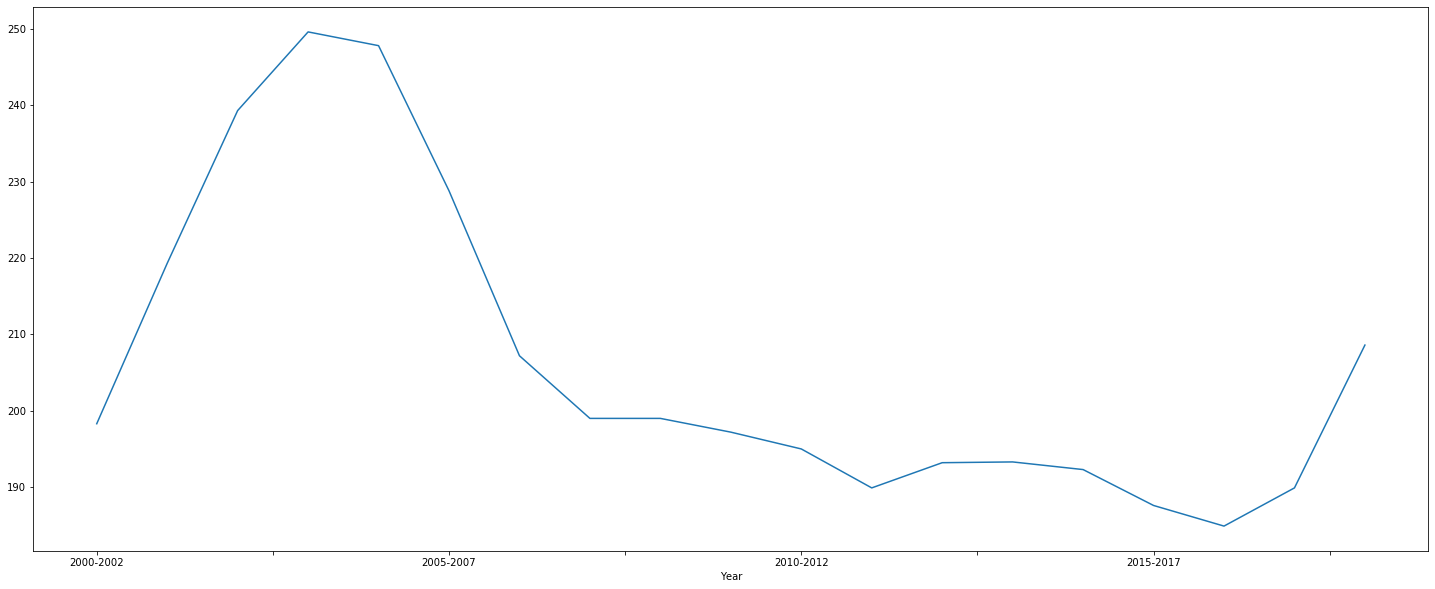

In [51]:
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
food_security_npu_ind.plot.line(x = 'Year', y = 'Value', ax = ax, legend = None)

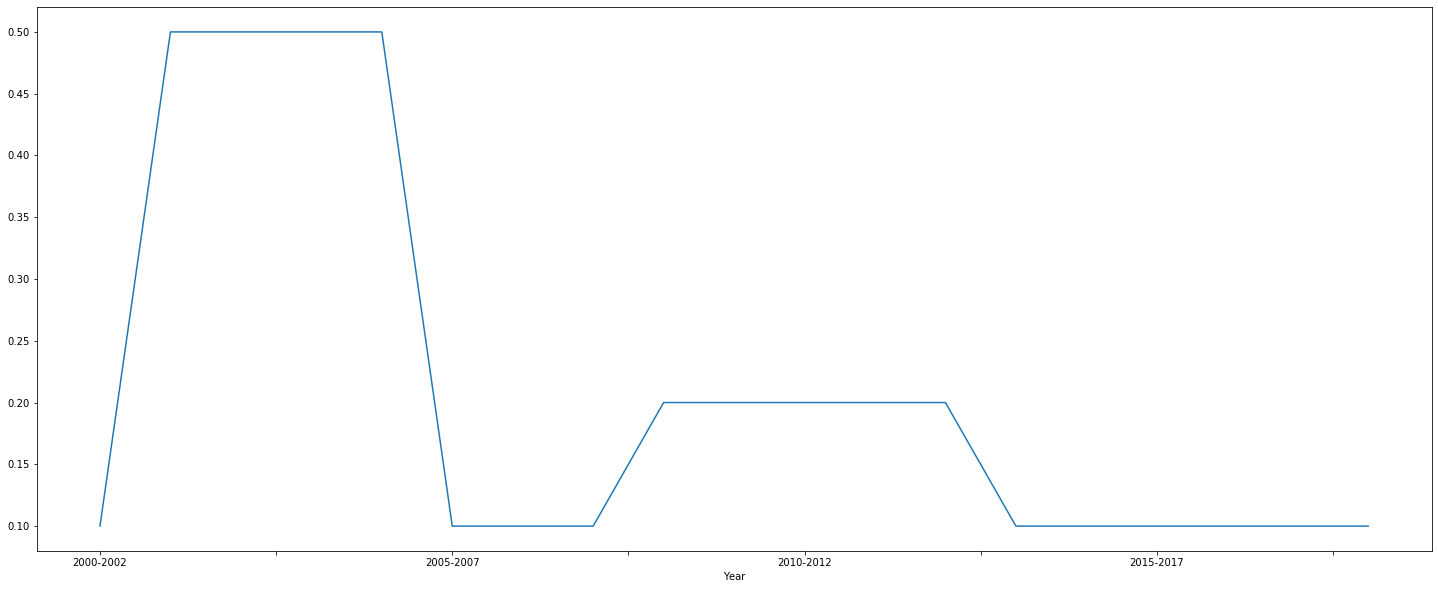

In [52]:
food_security_npu_esw = food_security_npu[food_security_npu['Area'] == 'Eswatini']
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
food_security_npu_esw.plot.line(x = 'Year', y = 'Value', ax = ax, legend = None)

In [53]:
food_security_psfi = food_security[food_security['Item'] == 'Prevalence of severe food insecurity in the total population (percent) (3-year average)']
food_security_psfi

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
163,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20142016,2014-2016,%,14.8,F,FAO estimate,NaN
164,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20152017,2015-2017,%,15.1,F,FAO estimate,NaN
165,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20162018,2016-2018,%,17.3,F,FAO estimate,NaN
166,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20172019,2017-2019,%,17.3,NaN,Official data,Official estimate integrated with FAO data
167,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20182020,2018-2020,%,19.8,NaN,Official data,Official estimate integrated with FAO data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104919,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,210401,Prevalence of severe food insecurity in the to...,20142016,2014-2016,%,35.5,F,FAO estimate,NaN
104920,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,210401,Prevalence of severe food insecurity in the to...,20152017,2015-2017,%,36.7,F,FAO estimate,NaN
104921,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,210401,Prevalence of severe food insecurity in the to...,20162018,2016-2018,%,35.9,F,FAO estimate,NaN
104922,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,210401,Prevalence of severe food insecurity in the to...,20172019,2017-2019,%,34.2,F,FAO estimate,NaN


In [54]:
food_security_psfi_2018 = food_security_psfi[food_security_psfi['Year'] == '2018-2020']
food_security_psfi_2018 = food_security_psfi_2018.sort_values(by = 'Value', ascending = False)

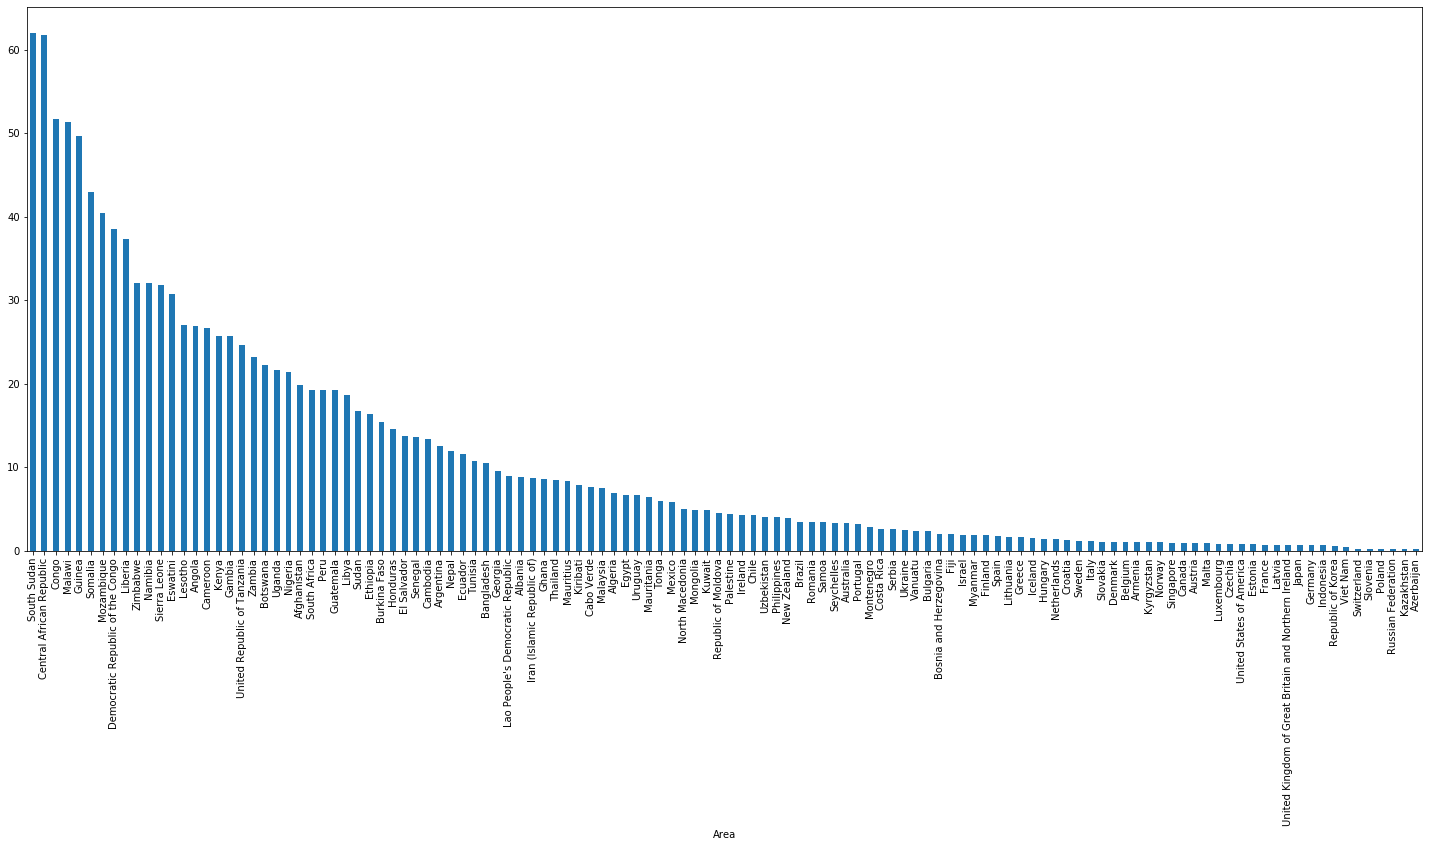

In [55]:
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
food_security_psfi_2018.plot.bar(x = 'Area', y = 'Value', ax = ax, legend = None)

In [56]:
food_security_psfi_ss = food_security_psfi[food_security_psfi['Area'] == 'South Sudan']
food_security_psfi_ss

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
88573,FS,Suite of Food Security Indicators,277,South Sudan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20142016,2014-2016,%,65.4,NaN,Official data,Official estimate
88575,FS,Suite of Food Security Indicators,277,South Sudan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20162018,2016-2018,%,65.4,NaN,Official data,Official estimate
88576,FS,Suite of Food Security Indicators,277,South Sudan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20172019,2017-2019,%,63.7,NaN,Official data,Official estimate
88577,FS,Suite of Food Security Indicators,277,South Sudan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20182020,2018-2020,%,62.0,NaN,Official data,Official estimate


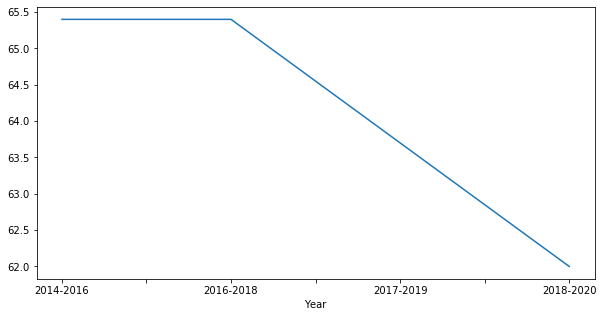

In [57]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
food_security_psfi_ss.plot.line(x = 'Year', y = 'Value', ax = ax, legend = None)

In [58]:
food_security_psfi_az = food_security_psfi[food_security_psfi['Area'] == 'Azerbaijan']
food_security_psfi_az

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
5580,FS,Suite of Food Security Indicators,52,Azerbaijan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20142016,2014-2016,%,0.25,F,FAO estimate,NaN
5581,FS,Suite of Food Security Indicators,52,Azerbaijan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20152017,2015-2017,%,0.25,F,FAO estimate,NaN
5582,FS,Suite of Food Security Indicators,52,Azerbaijan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20162018,2016-2018,%,0.25,F,FAO estimate,NaN
5583,FS,Suite of Food Security Indicators,52,Azerbaijan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20172019,2017-2019,%,0.25,F,FAO estimate,NaN
5584,FS,Suite of Food Security Indicators,52,Azerbaijan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20182020,2018-2020,%,0.25,F,FAO estimate,NaN


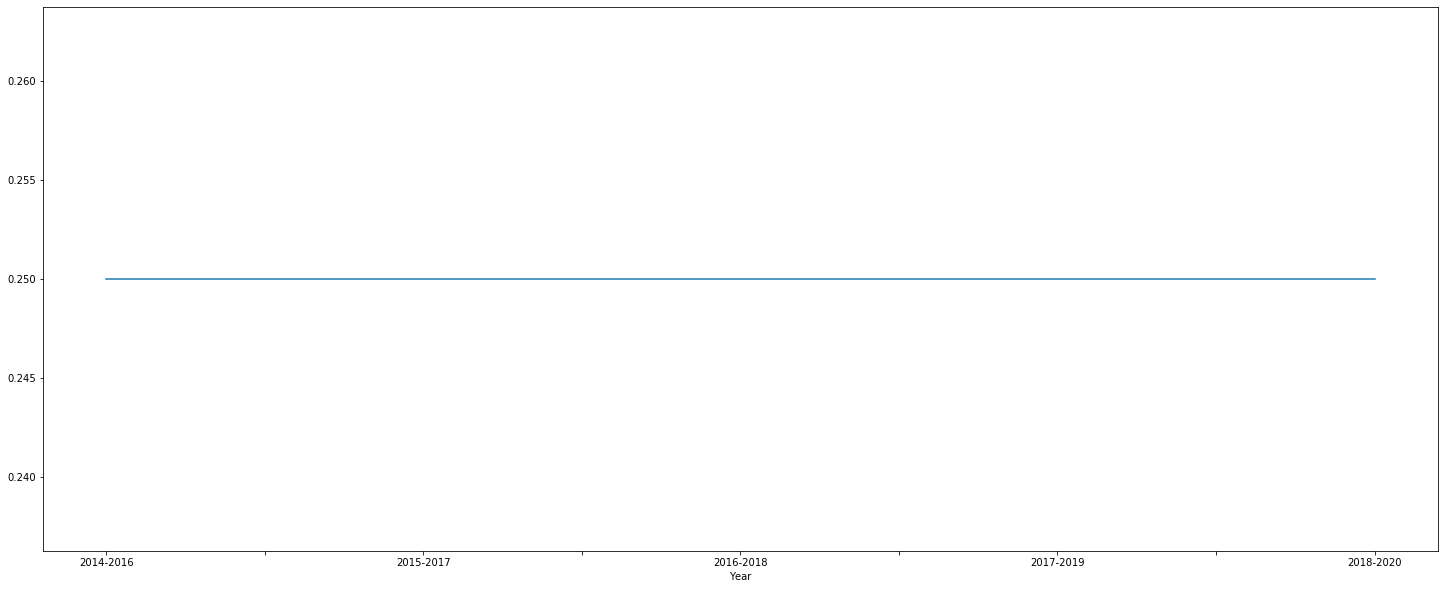

In [59]:
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
food_security_psfi_az.plot.line(x = 'Year', y = 'Value', ax = ax, legend = None)

In [60]:
food_security_poa = food_security[food_security['Item'] == 'Prevalence of anemia among women of reproductive age (15-49 years)']
food_security_poa

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
416,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21043,Prevalence of anemia among women of reproducti...,2000,2000,%,35.7,X,International reliable sources,NaN
417,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21043,Prevalence of anemia among women of reproducti...,2001,2001,%,35.6,X,International reliable sources,NaN
418,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21043,Prevalence of anemia among women of reproducti...,2002,2002,%,35.4,X,International reliable sources,NaN
419,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21043,Prevalence of anemia among women of reproducti...,2003,2003,%,35.4,X,International reliable sources,NaN
420,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21043,Prevalence of anemia among women of reproducti...,2004,2004,%,35.5,X,International reliable sources,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105211,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,21043,Prevalence of anemia among women of reproducti...,2015,2015,%,29.1,X,International reliable sources,NaN
105212,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,21043,Prevalence of anemia among women of reproducti...,2016,2016,%,28.9,X,International reliable sources,NaN
105213,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,21043,Prevalence of anemia among women of reproducti...,2017,2017,%,28.8,X,International reliable sources,NaN
105214,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,21043,Prevalence of anemia among women of reproducti...,2018,2018,%,28.8,X,International reliable sources,NaN


In [61]:
import plotly.graph_objects as go
import pandas as pd

countrycodes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

food_security = pd.merge(food_security, countrycodes, how = 'left', left_on = 'Area', right_on = 'COUNTRY')
df = food_security[food_security['Item'] == 'Prevalence of severe food insecurity in the total population (percent) (3-year average)']
df = df[df['Year'] == '2018-2020']

In [62]:
fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'],
    z = df['Value'],
    text = df['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Severe Food Insecurity<br>Percentage of Population',
))

fig.update_layout(
    title_text='Prevalence of Severe Food Insecurity in the Total Population in 2018-2020',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [63]:
df2 = food_security[food_security['Item'] == 'Prevalence of severe food insecurity in the total population (percent) (3-year average)']
df2 = df2[df2['Year'] == '2014-2016']

In [64]:
fig = go.Figure(data=go.Choropleth(
    locations = df2['CODE'],
    z = df2['Value'],
    text = df2['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Severe Food Insecurity<br>Percentage of Population',
))

fig.update_layout(
    title_text='Prevalence of Severe Food Insecurity in the Total Population in 2014-2016',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [65]:
df3 = food_security[food_security['Item'] == 'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)']
df3 = df3[df3['Year'] == '2018-2020']

In [66]:
fig = go.Figure(data=go.Choropleth(
    locations = df3['CODE'],
    z = df3['Value'],
    text = df3['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Moderate/Severe Food Insecurity<br>Percentage of Population',
))

fig.update_layout(
    title_text='Prevalence of Moderate or Severe Food Insecurity in the Total Population in 2018-2020',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [67]:
df4 = food_security[food_security['Item'] == 'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)']
df4 = df4[df4['Year'] == '2014-2016']

In [68]:
fig = go.Figure(data=go.Choropleth(
    locations = df4['CODE'],
    z = df4['Value'],
    text = df4['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Moderate/Severe Food Insecurity<br>Percentage of Population',
))

fig.update_layout(
    title_text='Prevalence of Moderate or Severe Food Insecurity in the Total Population in 2014-2016',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [69]:
gdp_v_fs = pd.DataFrame()
gdp_v_fs['Country'] = food_security['Area'].unique()


In [70]:
gdp = food_security[food_security['Item'] == 'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)']
gdp_2020 = gdp[gdp['Year'] == '2020']
gdp_2020

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,COUNTRY,GDP (BILLIONS),CODE
124,FS,Suite of Food Security Indicators,2,Afghanistan,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,1979.0,X,International reliable sources,NaN,Afghanistan,21.71,AFG
675,FS,Suite of Food Security Indicators,3,Albania,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,13295.4,X,International reliable sources,NaN,Albania,13.40,ALB
1274,FS,Suite of Food Security Indicators,4,Algeria,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,10681.7,X,International reliable sources,NaN,Algeria,227.80,DZA
2129,FS,Suite of Food Security Indicators,7,Angola,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,6198.1,X,International reliable sources,NaN,Angola,131.40,AGO
2655,FS,Suite of Food Security Indicators,8,Antigua and Barbuda,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,17956.3,X,International reliable sources,NaN,Antigua and Barbuda,1.24,ATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97348,FS,Suite of Food Security Indicators,235,Uzbekistan,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,6994.2,X,International reliable sources,NaN,Uzbekistan,63.08,UZB
97898,FS,Suite of Food Security Indicators,155,Vanuatu,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,2762.8,X,International reliable sources,NaN,Vanuatu,0.82,VUT
98938,FS,Suite of Food Security Indicators,237,Viet Nam,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,8200.3,X,International reliable sources,NaN,NaN,NaN,NaN
99985,FS,Suite of Food Security Indicators,251,Zambia,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,3270.0,X,International reliable sources,NaN,Zambia,25.61,ZMB


In [71]:
pd.set_option('display.max_columns', None)
gdp_v_fs = pd.merge(gdp_v_fs, gdp_2020, how = 'left', left_on = 'Country', right_on = 'Area')
gdp_v_fs = gdp_v_fs.rename(columns = {'Value': 'GDP'})
gdp_v_fs = pd.merge(gdp_v_fs, food_security_psfi_2018, how = 'left', left_on = 'Country', right_on = 'Area')
gdp_v_fs = gdp_v_fs.rename(columns = {'Value': 'PSFI'})
gdp_v_fs

,Country,Domain Code_x,Domain_x,Area Code (FAO)_x,Area_x,Element Code_x,Element_x,Item Code_x,Item_x,Year Code_x,Year_x,Unit_x,GDP,Flag_x,Flag Description_x,Note_x,COUNTRY,GDP (BILLIONS),CODE,Domain Code_y,Domain_y,Area Code (FAO)_y,Area_y,Element Code_y,Element_y,Item Code_y,Item_y,Year Code_y,Year_y,Unit_y,PSFI,Flag_y,Flag Description_y,Note_y
0,Afghanistan,FS,Suite of Food Security Indicators,2.0,Afghanistan,6126.0,Value,22013.0,"Gross domestic product per capita, PPP, dissem...",2020.0,2020,I$,1979.0,X,International reliable sources,NaN,Afghanistan,21.71,AFG,FS,Suite of Food Security Indicators,2.0,Afghanistan,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,19.8,NaN,Official data,Official estimate integrated with FAO data
1,Albania,FS,Suite of Food Security Indicators,3.0,Albania,6126.0,Value,22013.0,"Gross domestic product per capita, PPP, dissem...",2020.0,2020,I$,13295.4,X,International reliable sources,NaN,Albania,13.40,ALB,FS,Suite of Food Security Indicators,3.0,Albania,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,8.8,F,FAO estimate,NaN
2,Algeria,FS,Suite of Food Security Indicators,4.0,Algeria,6126.0,Value,22013.0,"Gross domestic product per capita, PPP, dissem...",2020.0,2020,I$,10681.7,X,International reliable sources,NaN,Algeria,227.80,DZA,FS,Suite of Food Security Indicators,4.0,Algeria,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,6.9,F,FAO estimate,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,Viet Nam,FS,Suite of Food Security Indicators,237.0,Viet Nam,6126.0,Value,22013.0,"Gross domestic product per capita, PPP, dissem...",2020.0,2020,I$,8200.3,X,International reliable sources,NaN,NaN,NaN,NaN,FS,Suite of Food Security Indicators,237.0,Viet Nam,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,0.5,NaN,Official data,Official estimate integrated with FAO data
201,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Zambia,FS,Suite of Food Security Indicators,251.0,Zambia,6126.0,Value,22013.0,"Gross domestic product per capita, PPP, dissem...",2020.0,2020,I$,3270.0,X,International reliable sources,NaN,Zambia,25.61,ZMB,FS,Suite of Food Security Indicators,251.0,Zambia,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,23.2,NaN,Official data,Official estimate integrated with FAO data


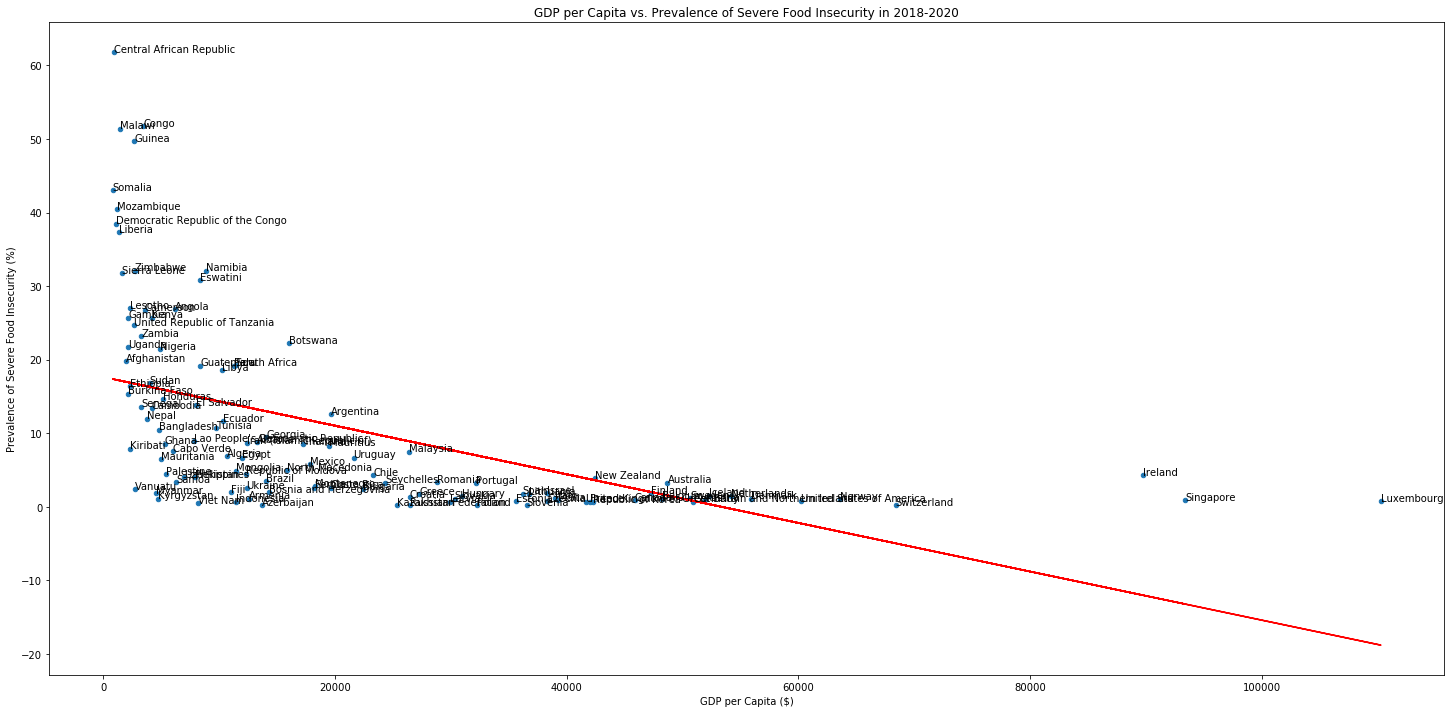

In [72]:
gdp_v_fs = gdp_v_fs.dropna(subset = ['GDP', 'PSFI'])

x = list(gdp_v_fs['GDP'])
y = list(gdp_v_fs['PSFI'])
n = list(gdp_v_fs['Country'])

fig_dims = (25, 12)
fig, ax = plt.subplots(figsize=fig_dims)
gdp_v_fs.plot.scatter(x = 'GDP', y = 'PSFI', ax = ax, legend = None)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
ax.set_xlabel('GDP per Capita ($)')
ax.set_ylabel('Prevalence of Severe Food Insecurity (%)')
ax.set_title('GDP per Capita vs. Prevalence of Severe Food Insecurity in 2018-2020')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'r')
plt.show()

In [73]:
fs_v_ps = pd.DataFrame()
fs_v_ps['Country'] = food_security['Area'].unique()
ps = food_security[food_security['Item'] == 'Political stability and absence of violence/terrorism (index)']
ps_2019 = ps[ps['Year'] == '2019']

In [74]:
fs_v_ps = pd.merge(fs_v_ps, ps_2019, how = 'left', left_on = 'Country', right_on = 'Area')
fs_v_ps = fs_v_ps.rename(columns = {'Value': 'Political Stability'})
fs_v_ps = pd.merge(fs_v_ps, food_security_psfi_2018, how = 'left', left_on = 'Country', right_on = 'Area')
fs_v_ps = fs_v_ps.rename(columns = {'Value': 'PSFI'})
fs_v_ps

,Country,Domain Code_x,Domain_x,Area Code (FAO)_x,Area_x,Element Code_x,Element_x,Item Code_x,Item_x,Year Code_x,Year_x,Unit_x,Political Stability,Flag_x,Flag Description_x,Note_x,COUNTRY,GDP (BILLIONS),CODE,Domain Code_y,Domain_y,Area Code (FAO)_y,Area_y,Element Code_y,Element_y,Item Code_y,Item_y,Year Code_y,Year_y,Unit_y,PSFI,Flag_y,Flag Description_y,Note_y
0,Afghanistan,FS,Suite of Food Security Indicators,2.0,Afghanistan,6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,-2.65,X,International reliable sources,NaN,Afghanistan,21.71,AFG,FS,Suite of Food Security Indicators,2.0,Afghanistan,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,19.8,NaN,Official data,Official estimate integrated with FAO data
1,Albania,FS,Suite of Food Security Indicators,3.0,Albania,6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,0.12,X,International reliable sources,NaN,Albania,13.40,ALB,FS,Suite of Food Security Indicators,3.0,Albania,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,8.8,F,FAO estimate,NaN
2,Algeria,FS,Suite of Food Security Indicators,4.0,Algeria,6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,-1.00,X,International reliable sources,NaN,Algeria,227.80,DZA,FS,Suite of Food Security Indicators,4.0,Algeria,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,6.9,F,FAO estimate,NaN
3,American Samoa,FS,Suite of Food Security Indicators,5.0,American Samoa,6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,1.16,X,International reliable sources,NaN,American Samoa,0.75,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,FS,Suite of Food Security Indicators,6.0,Andorra,6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,1.62,X,International reliable sources,NaN,Andorra,4.80,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Venezuela (Bolivarian Republic of),FS,Suite of Food Security Indicators,236.0,Venezuela (Bolivarian Republic of),6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,-1.45,X,International reliable sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,Viet Nam,FS,Suite of Food Security Indicators,237.0,Viet Nam,6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,0.13,X,International reliable sources,NaN,NaN,NaN,NaN,FS,Suite of Food Security Indicators,237.0,Viet Nam,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,0.5,NaN,Official data,Official estimate integrated with FAO data
201,Yemen,FS,Suite of Food Security Indicators,249.0,Yemen,6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,-2.77,X,International reliable sources,NaN,Yemen,45.45,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Zambia,FS,Suite of Food Security Indicators,251.0,Zambia,6125.0,Value,21032.0,Political stability and absence of violence/te...,2019.0,2019,index,-0.10,X,International reliable sources,NaN,Zambia,25.61,ZMB,FS,Suite of Food Security Indicators,251.0,Zambia,6121.0,Value,210401.0,Prevalence of severe food insecurity in the to...,20182020.0,2018-2020,%,23.2,NaN,Official data,Official estimate integrated with FAO data


In [80]:
fs_v_ps = fs_v_ps.sort_values(by = 'PSFI', ascending = True)

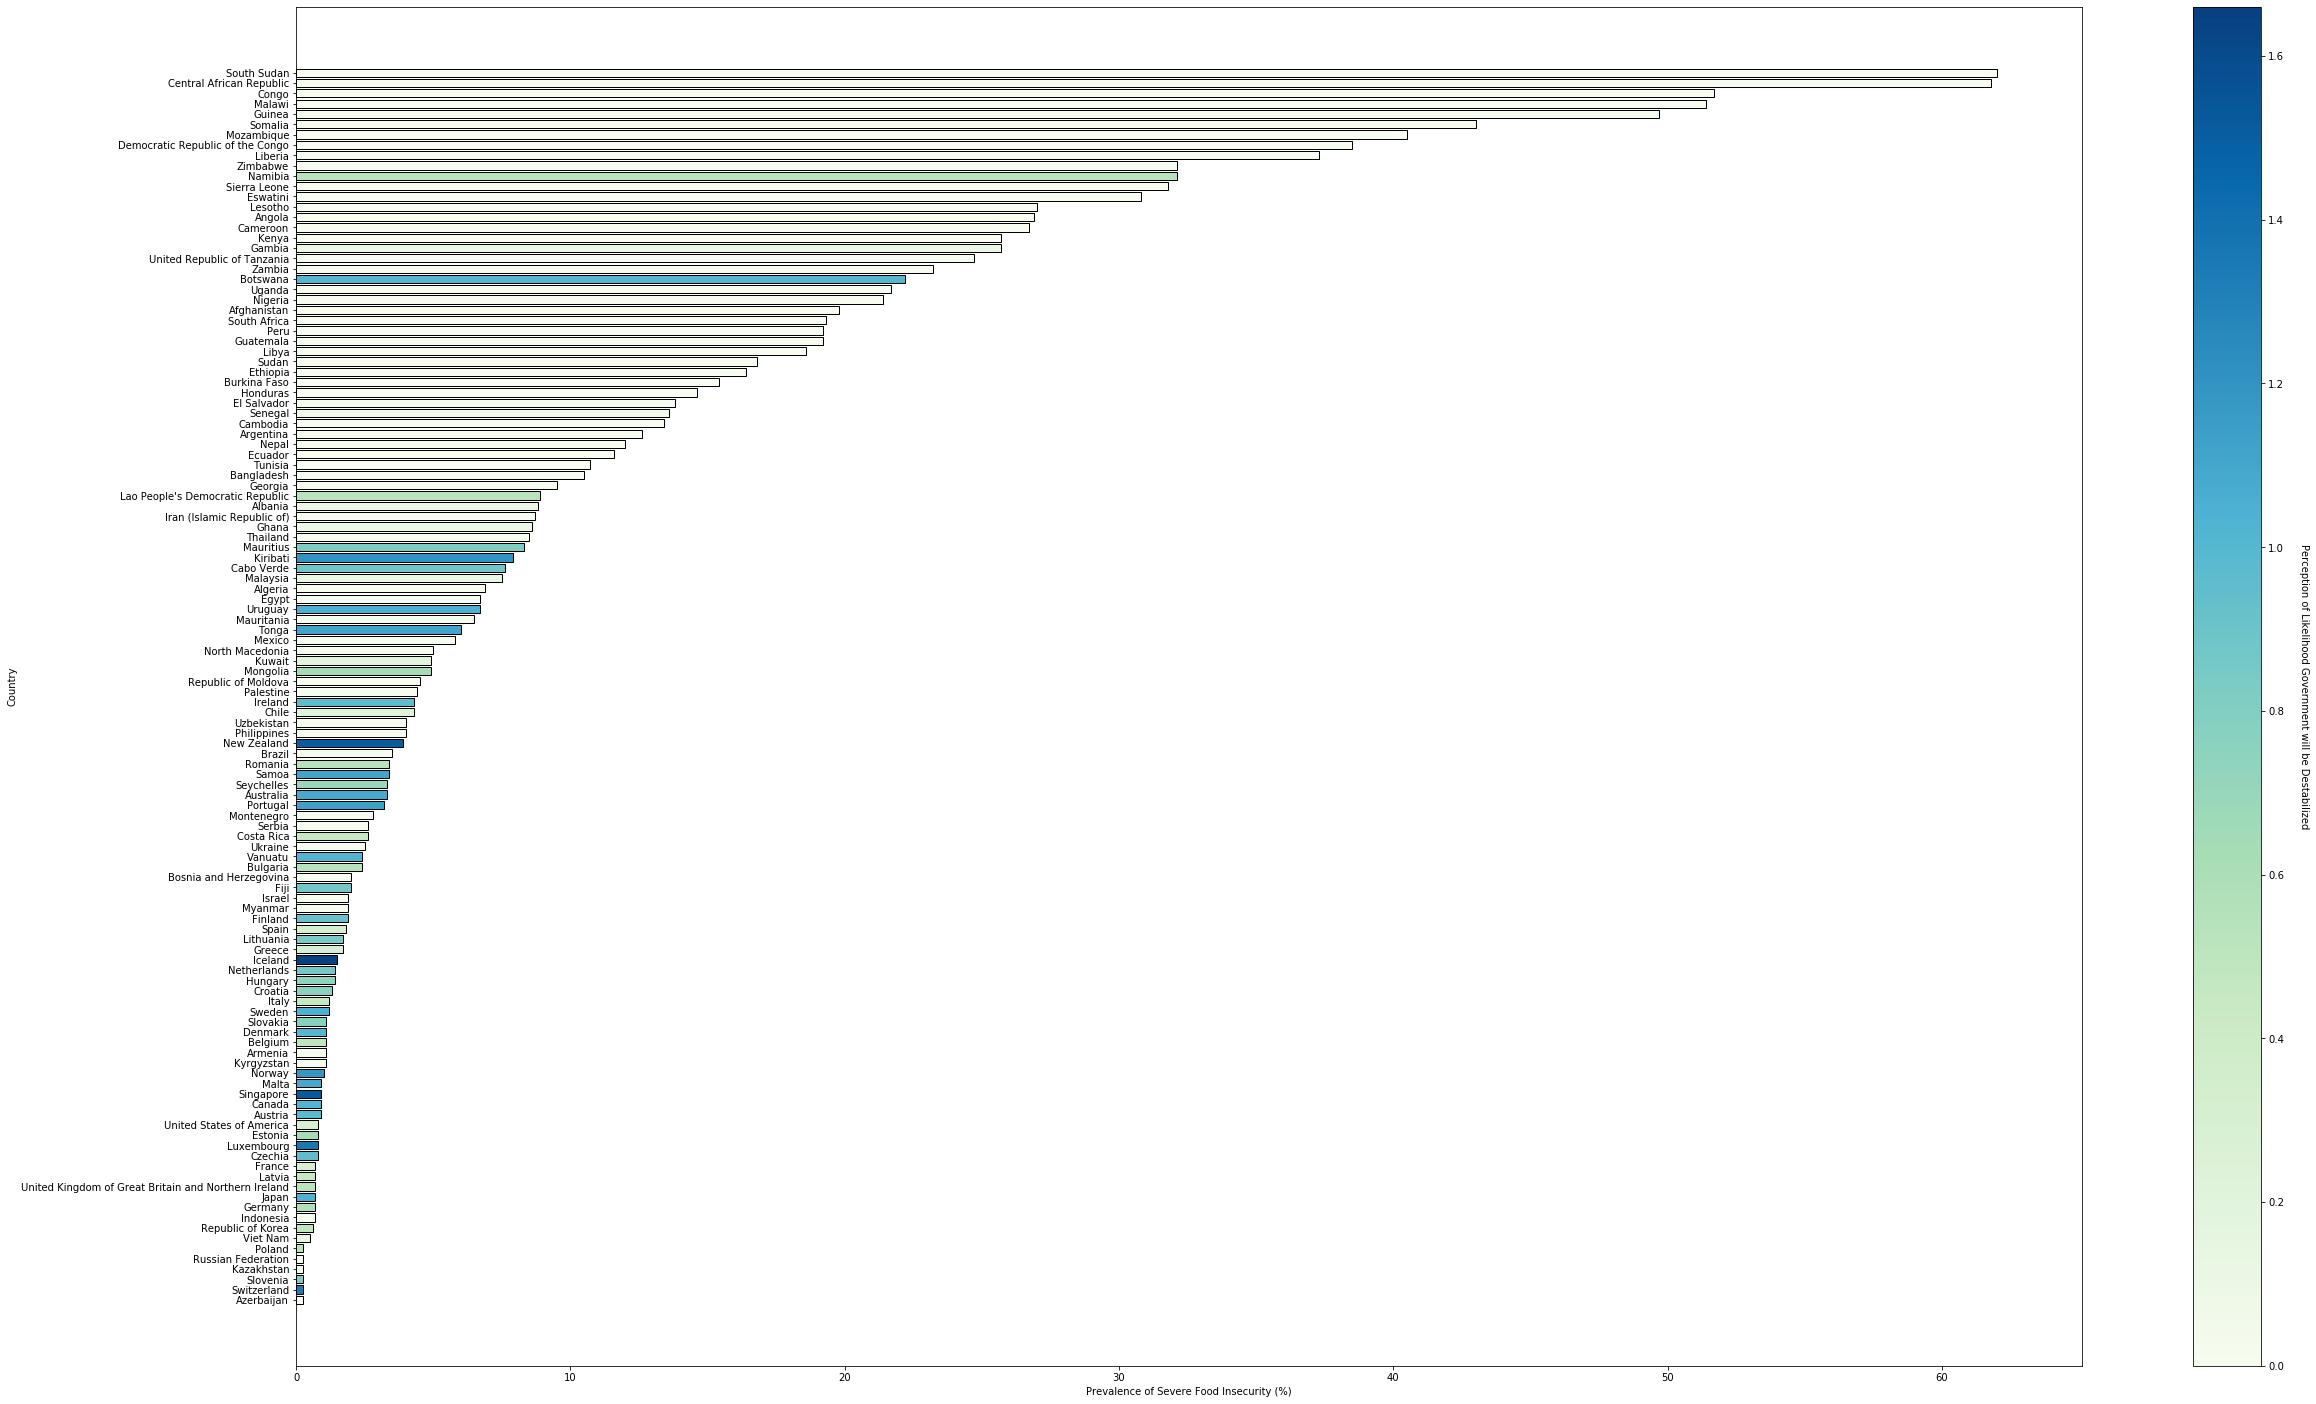

In [85]:
fs_v_ps = fs_v_ps.dropna(subset = ['PSFI'])

from matplotlib.cm import ScalarMappable

data_x = fs_v_ps['Country']
data_hight = fs_v_ps['PSFI']
data_color = fs_v_ps['Political Stability']

data_color_normalized = [x / max(data_color) for x in data_color]

fig, ax = plt.subplots(figsize=(40, 25))

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color_normalized)

rects = ax.barh(data_x, data_hight, color=colors, edgecolor = 'black')

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))

sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Perception of Likelihood Government will be Destabilized', rotation=270,labelpad=25)

ax.set_xlabel('Prevalence of Severe Food Insecurity (%)')
ax.set_ylabel('Country')

plt.show()